## Model Evaluation

## We have decided to encounter 2 different type of problems 1) Binary Classification and 2) Multiclass Classification. In binary classification we have used LightGBM and LinearSVC. In this we have treated Benign to be class 1 and Malicious to be class 0.

### LinearSVC

In [ ]:
df1 = pd.read_csv('CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv',sep = '|')
df2 = pd.read_csv('CTU-IoT-Malware-Capture-20-1conn.log.labeled.csv',sep='|')
df3 = pd.read_csv('CTU-IoT-Malware-Capture-21-1conn.log.labeled.csv',sep='|')
df4 = pd.read_csv('CTU-IoT-Malware-Capture-3-1conn.log.labeled.csv',sep='|')
df5 = pd.read_csv('CTU-IoT-Malware-Capture-34-1conn.log.labeled.csv',sep='|')
df6 = pd.read_csv('CTU-IoT-Malware-Capture-35-1conn.log.labeled.csv',sep='|')
df7 = pd.read_csv('CTU-IoT-Malware-Capture-42-1conn.log.labeled.csv',sep='|')
df8 = pd.read_csv('CTU-IoT-Malware-Capture-48-1conn.log.labeled.csv',sep='|')
df9 = pd.read_csv('CTU-IoT-Malware-Capture-60-1conn.log.labeled.csv',sep='|')
df10 = pd.read_csv('CTU-IoT-Malware-Capture-9-1conn.log.labeled.csv',sep='|')
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10],axis = 0)

In [ ]:
df.replace('-', np.nan, inplace=True)

In [ ]:
df = pd.get_dummies(data = df, columns=['proto', 'conn_state', 'service'],drop_first=True)
df['history'] = pd.factorize(df['history'])[0] + 1
df['duration'] = df['duration'].astype('float')
df['orig_bytes'] = df['orig_bytes'].astype('float')
df['resp_bytes'] = df['resp_bytes'].astype('float')

In [ ]:
desired_value = 'Benign'

df['label'] = [1 if x == desired_value else 0 for x in df['label']]

In [ ]:
df = df.drop(columns=['uid', 'local_orig', 'local_resp', 'tunnel_parents', 'detailed-label', 'id.orig_h', 'id.resp_h'])

In [ ]:
df = df.fillna(0)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
y = df['label']
X = df.drop(columns = ['label'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)
svm_classifier.fit(X_train_scaled,y_train)

LinearSVC() <br>
**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

In [ ]:
y_pred = svm_classifier.predict(X_test_scaled)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)

In [ ]:
accuracy

0.985838

In [ ]:
print(report)

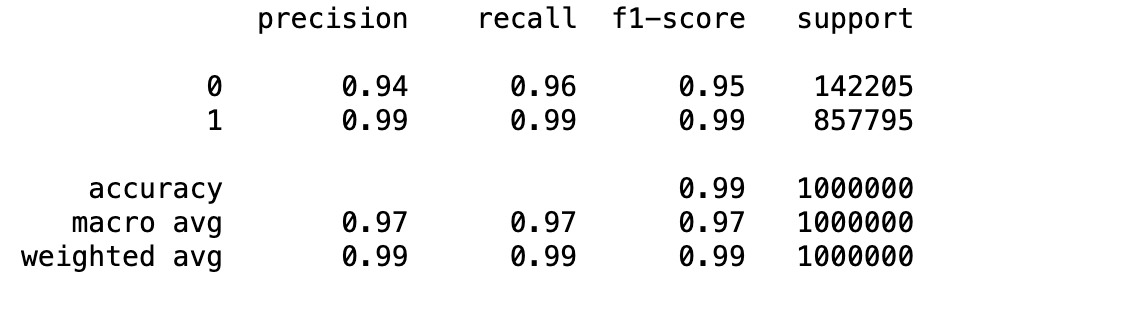

### LightGBM

In [ ]:
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

In [ ]:
train_data = lgb.Dataset(X_train, label=y_train)
model = lgb.train(params, train_data, num_boost_round=100)
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_binary)
print(report)

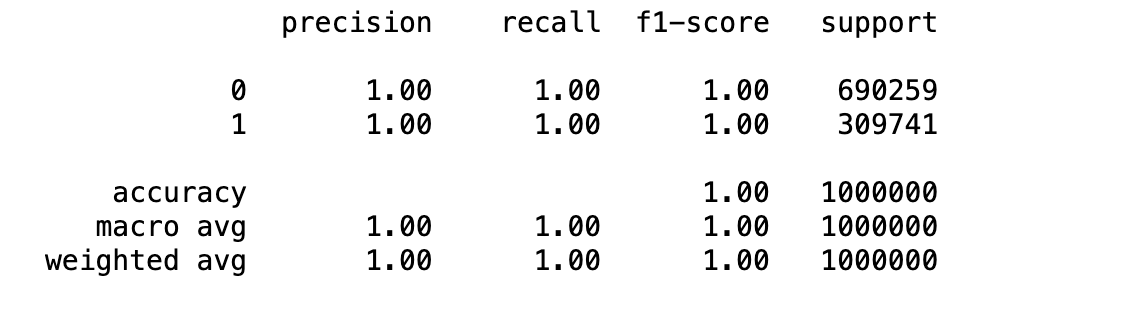

## For MultiClass Classification

| No. | Accuracy | Model                   | Type of Classification |
|-----|---------:|-------------------------|------------------------|
| 1   |      98% | LinearSVC               | Binary                 |
| 2   |      99% | LightGBM                | Binary                 |
| 3   |      86% | Logistic Regression     | Multiclass             |
| 4   |      88% | Multinomial Naive Bayes | Multiclass             |
| 5   |      99% | Xgboost Classifier      | Multiclass             |

## It was computationally expensive to reload the data and rerun the data in main file, that is the reason we are comparing all the models over here and giving our resaon for the same.

## In case of Binary Classification LinearSVC gives us 98% accuracy whereas LightGBM gives us 99% accuracy

## The reason behind difference in accuracy of Logistic Regression, Multinomial Naive Bayes and Xgboost Classifier is that logisitc regression is not able to generalise well because of the high number of instances, whereas Xgboost is able to generalise very well.

### To see all the intricacies of the model applied, we have to go to individual files as it was not computationally possible to run all the models again